Stock Market Prediction Techniques: A Review Paper https://www.researchgate.net/publication/372296944_Techniques_for_Stock_Market_Prediction_A_Review

Enhancing Stock Market Prediction Through LSTM Modeling and Analysis https://eudl.eu/pdf/10.4108/eai.2-6-2023.2334692

Stock Price Prediction with Long-short Term Memory Model https://ieeexplore.ieee.org/document/9731005

Impact of Data Normalization on Stock Index Forecasting https://www.mirlabs.org/ijcisim/regular_papers_2014/IJCISIM_24.pdf

Exploiting noisy data normalization for stock market prediction https://www.researchgate.net/publication/316635771_Exploiting_noisy_data_normalization_for_stock_market_prediction

Abstract -> Introduction 

-> method and technique for reduced noise and enhance prediction
 
compare 

LSTM model

result

conclusion 

refference 

EMA
SMA
Exponentially smoothed 
kalman filter Estimate

In [1]:
import yfinance as yf
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, RobustScaler, Normalizer, MaxAbsScaler, PowerTransformer, Binarizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


dataset = yf.download('tsla', start='2022-01-01',
                      end=datetime.now().strftime('%Y-%m-%d'),
                      progress=False,
                      period="ytd")
dataset = dataset.reset_index()
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.index = range(len(dataset))
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700


In [2]:


sma_10 = dataset['Adj Close'].rolling(window=20).mean()
ema_10 = dataset['Adj Close'].ewm(span=20, adjust=False).mean()
# Kalman Filter (assumes constant level with Gaussian noise)
Q = 0.01
R = 1  # Measurement noise covariance (adjust for noise level)
P = 1  # Initial state covariance
xhat = np.zeros_like(dataset['Close'])  # Kalman filter state estimate (level)
xhat[0] = dataset['Close'][0]
for i in range(1, len(dataset['Close'])):
    # Predict
    xhat_pred = xhat[i-1]
    Phat_pred = P + Q

    # Update
    K = Phat_pred / (Phat_pred + R)
    xhat[i] = xhat_pred + K * (dataset['Close'][i] - xhat_pred)
    P = (1 - K) * Phat_pred

data = dataset.filter(['Close'])
#training_data_len = int(np.ceil(len(data.values) * .95))
training_data_len = int(np.ceil(len(data.values)) * .85)
training_data_len

data1 = dataset.filter(['Close']).ewm(span=20, adjust=False).mean()

# training_data_len = int(np.ceil(len(data.values) * .95))
training_data_len1 = int(np.ceil(len(data1.values)) * .85)

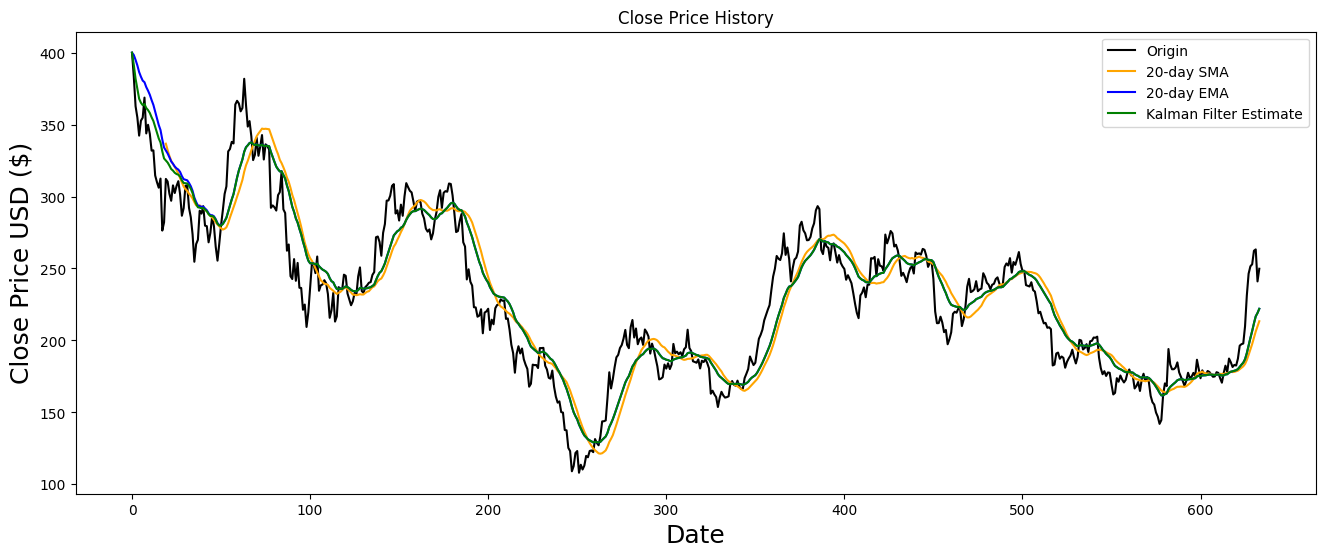

In [3]:

plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(dataset['Close'], label='Origin', color='black')
plt.plot(sma_10, label='20-day SMA', color='orange')
plt.plot(ema_10, label='20-day EMA', color='blue')
plt.plot(xhat, label='Kalman Filter Estimate', color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

Scaling to a range
1.Min-Max Normalization (done)
2.Max Abs Scaling (done)
3.Hyperbolic Tangent(Tanh)

Scaling to a Distributin
1.Z-Score Normalization(Standardization)(done)
2.Robust Scaler (done)
3.Quantile Transformation (done)

Scaling to a Shape
1.Logarithmic transformation (done)
2.Square Root Transformation (done)
3.Square Transformation
4.Exponential Transformation

Parametric Scaling
1.Power Transformation(Box-Cox) (done)
2.Yeo-Johnson Transformations

VertorNorm
1.L1
2.L2

Miscellaneous
1.Decimal Scaling
2.Winsorization


https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1

https://www.geeksforgeeks.org/data-normalization-in-data-mining/

16 Data Normalization Methods Using Python (With Examples) — Part 1 of 6
https://medium.com/@reinapeh/16-data-feature-normalization-methods-using-python-with-examples-part-1-of-3-26578b2b8ba6

In [4]:
#scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, RobustScaler, Normalizer, MaxAbsScaler, PowerTransformer, Binarizer

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

print("Scaler Min-Max", scaler)
print("Min-Max", scaled_data)

Scaler Min-Max MinMaxScaler()
Min-Max [[1.        ]
 [0.94267141]
 [0.87245853]
 [0.84570748]
 [0.80259974]
 [0.83819162]
 [0.84536479]
 [0.89313288]
 [0.80785398]
 [0.82847122]
 [0.80665461]
 [0.76683647]
 [0.76754465]
 [0.70772604]
 [0.69184905]
 [0.67859916]
 [0.70031298]
 [0.57659799]
 [0.59630147]
 [0.6995248 ]
 [0.6932768 ]
 [0.66404712]
 [0.64746195]
 [0.68421899]
 [0.66596606]
 [0.68271124]
 [0.69413347]
 [0.66277926]
 [0.61189287]
 [0.62989451]
 [0.68320232]
 [0.68429888]
 [0.63056838]
 [0.60844338]
 [0.56795126]
 [0.50228444]
 [0.54423861]
 [0.55463288]
 [0.6238064 ]
 [0.61688441]
 [0.63461185]
 [0.58823732]
 [0.58709506]
 [0.54859048]
 [0.57122946]
 [0.61071641]
 [0.58710646]
 [0.53804771]
 [0.50494586]
 [0.54551787]
 [0.58931099]
 [0.62514275]
 [0.66373873]
 [0.68175177]
 [0.76492893]
 [0.77078865]
 [0.78770501]
 [0.78395853]
 [0.8767076 ]
 [0.88553712]
 [0.87916342]
 [0.86044232]
 [0.86842646]
 [0.93794266]
 [0.87604512]
 [0.82407366]
 [0.83720935]
 [0.80092059]
 [0.744311

In [5]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print(i)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([1.        , 0.94267141, 0.87245853, 0.84570748, 0.80259974,
       0.83819162, 0.84536479, 0.89313288, 0.80785398, 0.82847122,
       0.80665461, 0.76683647, 0.76754465, 0.70772604, 0.69184905,
       0.67859916, 0.70031298, 0.57659799, 0.59630147, 0.6995248 ,
       0.6932768 , 0.66404712, 0.64746195, 0.68421899, 0.66596606,
       0.68271124, 0.69413347, 0.66277926, 0.61189287, 0.62989451,
       0.68320232, 0.68429888, 0.63056838, 0.60844338, 0.56795126,
       0.50228444, 0.54423861, 0.55463288, 0.6238064 , 0.61688441,
       0.63461185, 0.58823732, 0.58709506, 0.54859048, 0.57122946,
       0.61071641, 0.58710646, 0.53804771, 0.50494586, 0.54551787,
       0.58931099, 0.62514275, 0.66373873, 0.68175177, 0.76492893,
       0.77078865, 0.78770501, 0.78395853, 0.8767076 , 0.88553712])]
[0.8791634210498452]
60

[array([1.        , 0.94267141, 0.87245853, 0.84570748, 0.80259974,
       0.83819162, 0.84536479, 0.89313288, 0.80785398, 0.82847122,
       0.80665461, 0.76683647, 0.

Lstm model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=1)
#RMSE: 5.989546160938989
#Median Absolute Error (MAE): 3.715057373046875

#model.fit(x_train, y_train, epochs=5, batch_size=50)
#RMSE: 9.293033360524161
#Median Absolute Error (MAE): 4.8186492919921875



Epoch 1/2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0119
Epoch 2/2
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0061


In [7]:
from sklearn.metrics import median_absolute_error

test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = data.values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
medae = median_absolute_error(y_test, predictions)

# Print the evaluation metrics
print(f'RMSE: {rmse}')
print(f'Median Absolute Error (MAE): {medae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
RMSE: 16.702787517173654
Median Absolute Error (MAE): 14.026115417480469


/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_57834/537430229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


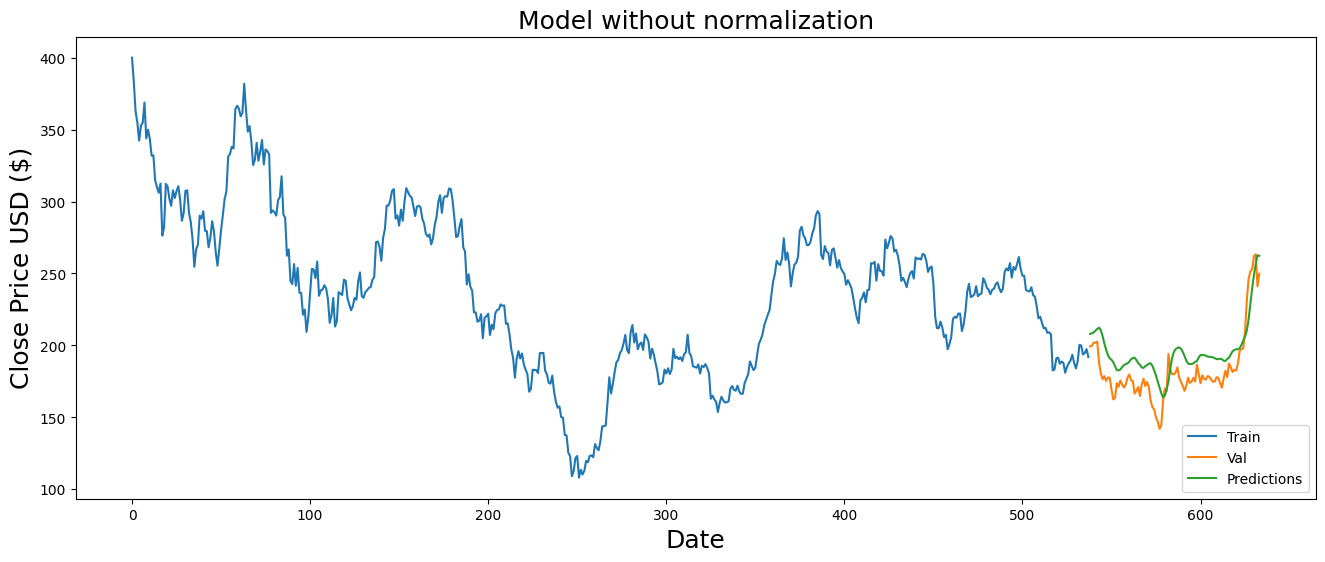

In [8]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model without normalization', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Experiment Zone 

In [9]:

all_predictions_list = []
def visualizeTrain(scaleable_type, xtrain, ytrain, model, training_data):
    # Create the training data set
    # Create the scaled training data set
    trained_data = scaleable_type[0:int(training_data), :]
    # Split the data into x_train and y_train data sets
    for i in range(60, len(trained_data)):
        xtrain.append(trained_data[i-60:i, 0])
        ytrain.append(trained_data[i, 0])
        if i <= 61:
            print(xtrain)
            print(ytrain)
            print(i)
            print()

    # Convert the x_train and y_train to numpy arrays
    xtrain, ytrain = np.array(xtrain), np.array(ytrain)

    # Reshape the data
    xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
    #model = Sequential()
    model.add(LSTM(128, return_sequences=True,
              input_shape=(xtrain.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    #model.add(Dense(25))
    model.add(Dense(50))
    #model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    #model.fit(xtrain, ytrain, epochs=2, batch_size=1)
    model.fit(xtrain, ytrain, epochs=5, batch_size=2, validation_split=0.2)
    
    
def Evaluation(scaleable_type, scaler, xtest, training_data, data, model):
    
    test_data = scaleable_type[training_data - 60:, :]
    # Create the data sets x_test and y_test

    ytest = data.values[training_data:, :]
    
    for i in range(60, len(test_data)):
        xtest.append(test_data[i-60:i, 0])

    # Convert the data to a numpy array
    xtest = np.array(xtest)

    # Reshape the data
    xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

    # Get the models predicted price values
    predicted = model.predict(xtest)
    predicted = scaler.inverse_transform(predicted)
    
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predicted - ytest) ** 2)))
    medae = median_absolute_error(ytest, predicted)

    # Print the evaluation metrics
    print(f'RMSE: {rmse}')
    print(f'Median Absolute Error (MAE): {medae}')
    
    train = data[:training_data]
    valid = data[training_data:].copy()
    valid['Predictions'] = predicted
    all_predictions_list.append(predicted)
    
    # Visualize the data
    plt.figure(figsize=(16, 6))
    plt.title('Model with normalization', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    

Scaling to a range

[array([1.        , 0.94267141, 0.87245853, 0.84570748, 0.80259974,
       0.83819162, 0.84536479, 0.89313288, 0.80785398, 0.82847122,
       0.80665461, 0.76683647, 0.76754465, 0.70772604, 0.69184905,
       0.67859916, 0.70031298, 0.57659799, 0.59630147, 0.6995248 ,
       0.6932768 , 0.66404712, 0.64746195, 0.68421899, 0.66596606,
       0.68271124, 0.69413347, 0.66277926, 0.61189287, 0.62989451,
       0.68320232, 0.68429888, 0.63056838, 0.60844338, 0.56795126,
       0.50228444, 0.54423861, 0.55463288, 0.6238064 , 0.61688441,
       0.63461185, 0.58823732, 0.58709506, 0.54859048, 0.57122946,
       0.61071641, 0.58710646, 0.53804771, 0.50494586, 0.54551787,
       0.58931099, 0.62514275, 0.66373873, 0.68175177, 0.76492893,
       0.77078865, 0.78770501, 0.78395853, 0.8767076 , 0.88553712])]
[0.8791634210498452]
60

[array([1.        , 0.94267141, 0.87245853, 0.84570748, 0.80259974,
       0.83819162, 0.84536479, 0.89313288, 0.80785398, 0.82847122,
       0.80665461, 0.76683647, 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0175 - val_loss: 0.0017
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0021 - val_loss: 0.0054
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0018 - val_loss: 0.0013
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
RMSE: 12.449705401431029
Median Absolute Error (MAE): 7.8121185302734375


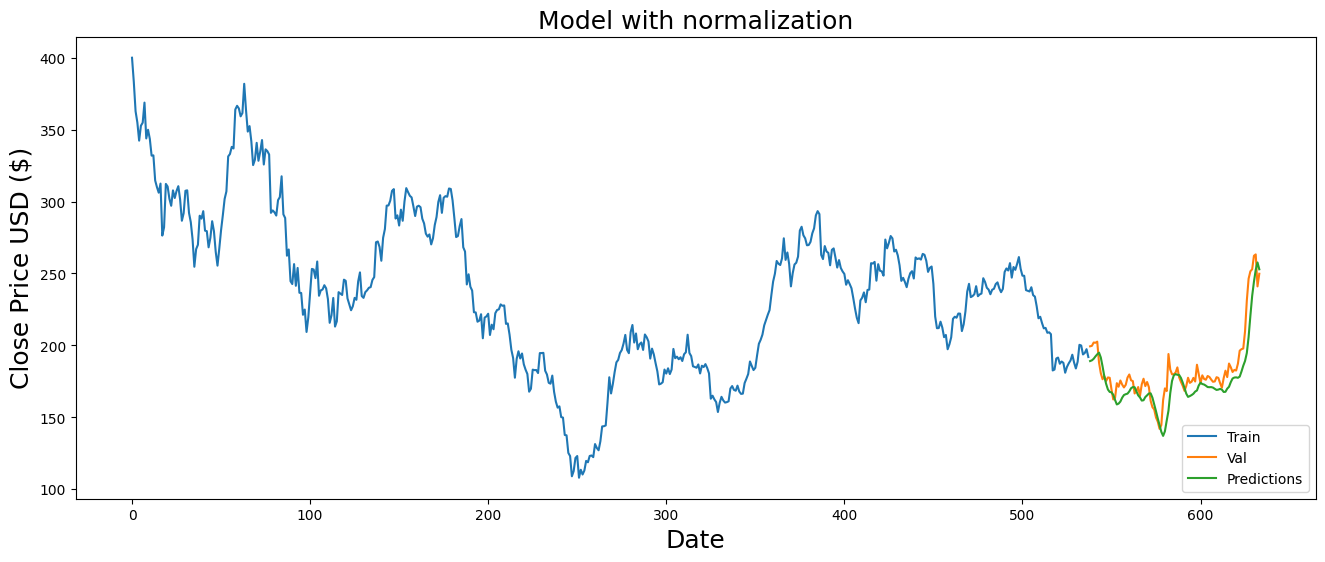

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)
x_train_MinMax = []
y_train_MinMax = []
x_test_MinMax = []
modelMinMax1 = Sequential()

visualizeTrain(scaled_data, x_train_MinMax,
               y_train_MinMax, modelMinMax1, training_data_len)
Evaluation(scaled_data, scaler, xtest=x_test_MinMax,
           training_data=training_data_len, data=data, model=modelMinMax1)


[array([3.11890788, 2.81262854, 2.43751458, 2.29459644, 2.06429235,
       2.25444277, 2.29276561, 2.54796776, 2.09236321, 2.20251134,
       2.08595559, 1.87322624, 1.87700969, 1.55742736, 1.47260413,
       1.40181633, 1.51782289, 0.85687265, 0.96213894, 1.51361204,
       1.48023194, 1.3240717 , 1.23546502, 1.43184037, 1.33432368,
       1.42378517, 1.48480873, 1.31729814, 1.04543639, 1.14161054,
       1.42640878, 1.43226721, 1.14521075, 1.02700741, 0.8106773 ,
       0.45985075, 0.68399192, 0.73952355, 1.10908468, 1.07210382,
       1.16681309, 0.91905605, 0.91295347, 0.70724184, 0.82819114,
       1.03915112, 0.91301437, 0.65091686, 0.47406943, 0.69082638,
       0.92479213, 1.11622419, 1.32242413, 1.41865918, 1.86303516,
       1.89434084, 1.9847169 , 1.96470124, 2.46021531, 2.50738725])]
[2.473335603625614]
60

[array([3.11890788, 2.81262854, 2.43751458, 2.29459644, 2.06429235,
       2.25444277, 2.29276561, 2.54796776, 2.09236321, 2.20251134,
       2.08595559, 1.87322624, 1.8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.2334 - val_loss: 0.0333
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0621 - val_loss: 0.0225
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0463 - val_loss: 0.0289
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0404 - val_loss: 0.0196
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0324 - val_loss: 0.0206
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
RMSE: 8.75200266381785
Median Absolute Error (MAE): 5.8756561279296875


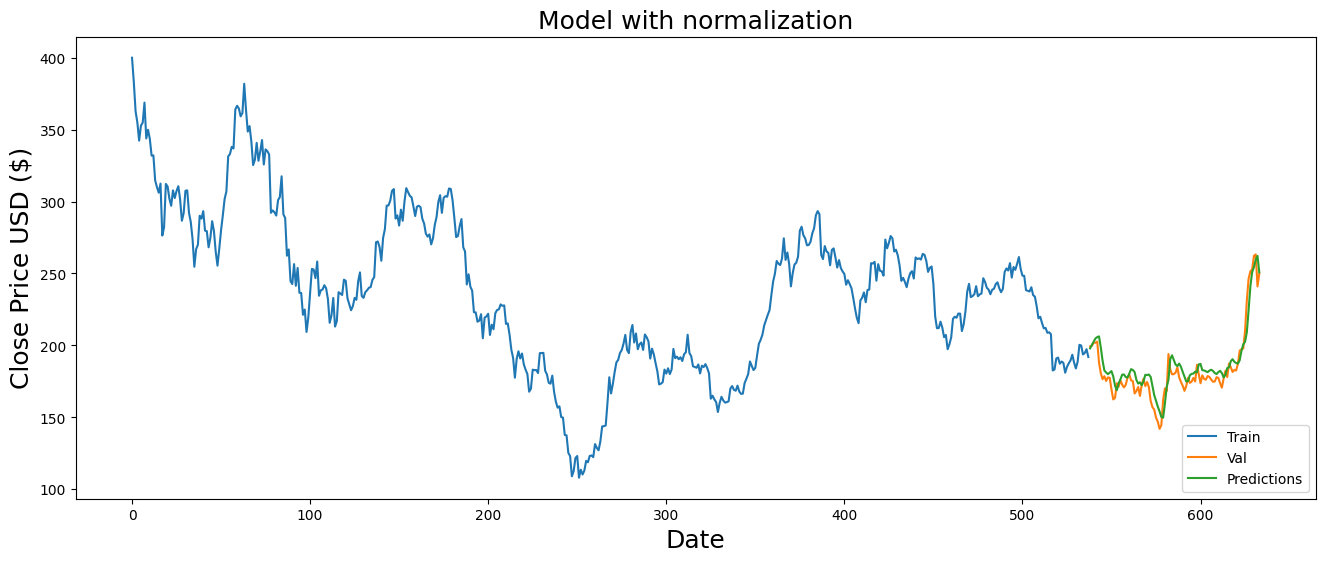

In [11]:
# Z-Score Normalization
scalerZScore = StandardScaler()
#scaled_Z_Score = scalerZScore.fit_transform(data.values)
scaled_Z_Score = scalerZScore.fit_transform(data.values.reshape(-1, 1))

x_train_Z = []
y_train_Z = []
x_test_Z = []
modelZ = Sequential()

visualizeTrain(scaled_Z_Score, x_train_Z, y_train_Z, modelZ, training_data_len)
Evaluation(scaled_Z_Score, scalerZScore, xtest=x_test_Z,training_data=training_data_len, data=data, model=modelZ)
#RMSE: 5.869824840358386
#Median Absolute Error (MAE): 2.579254150390625

[array([1.        , 0.9581673 , 0.90693293, 0.88741268, 0.85595694,
       0.88192835, 0.88716262, 0.92201901, 0.85979096, 0.87483538,
       0.85891578, 0.82986047, 0.83037723, 0.78672756, 0.77514211,
       0.76547367, 0.78131825, 0.69104336, 0.705421  , 0.78074311,
       0.77618394, 0.75485504, 0.74275283, 0.76957445, 0.75625529,
       0.76847425, 0.77680906, 0.75392988, 0.71679805, 0.72993386,
       0.76883259, 0.76963275, 0.73042558, 0.71428096, 0.68473384,
       0.63681673, 0.66743071, 0.67501542, 0.72549136, 0.72044039,
       0.73337611, 0.69953659, 0.69870308, 0.67060627, 0.68712594,
       0.71593959, 0.6987114 , 0.66291321, 0.63875877, 0.66836419,
       0.70032004, 0.7264665 , 0.75463   , 0.76777412, 0.82846854,
       0.83274438, 0.84508825, 0.84235444, 0.91003348, 0.91647639])]
[0.9118254941301266]
60

[array([1.        , 0.9581673 , 0.90693293, 0.88741268, 0.85595694,
       0.88192835, 0.88716262, 0.92201901, 0.85979096, 0.87483538,
       0.85891578, 0.82986047, 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0195 - val_loss: 0.0011
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0029 - val_loss: 0.0010
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0016 - val_loss: 5.9676e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
RMSE: 11.828419649659924
Median Absolute Error (MAE): 6.736122131347656


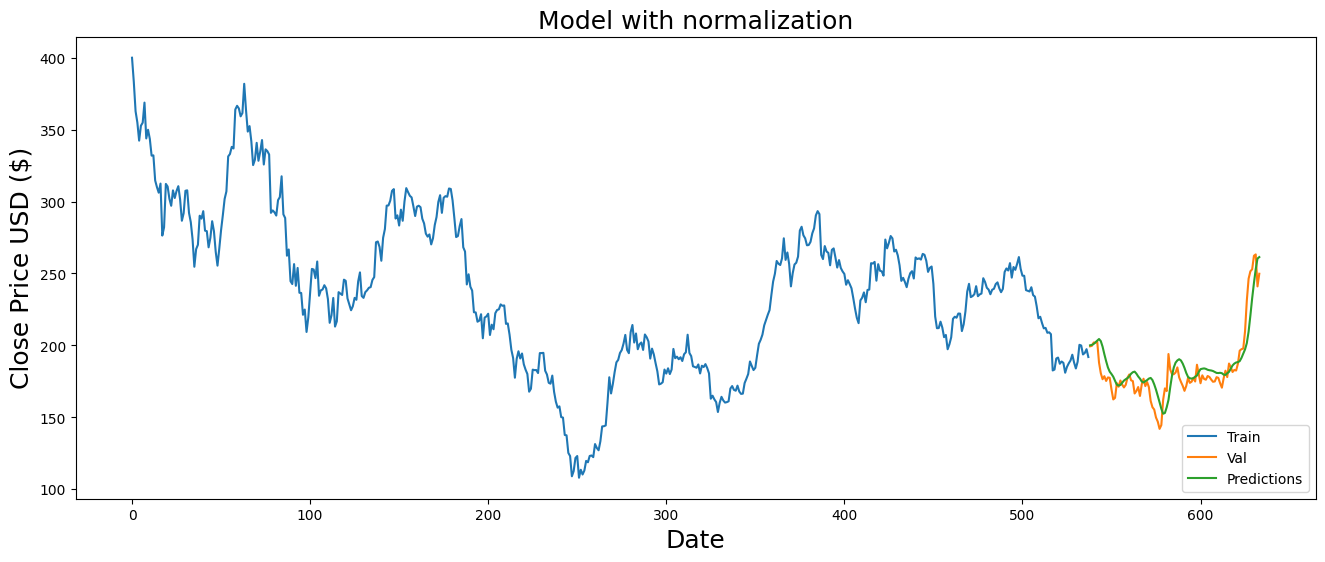

In [12]:
# Max Abs Scaling
scalerMaxAbs = MaxAbsScaler()
scaled_MaxAbs = scalerMaxAbs.fit_transform(data.values)

x_train_MaxAbs = []
y_train_MaxAbs = []
x_test_MaxAbs = []
modelMaxAbs = Sequential()

visualizeTrain(scaled_MaxAbs, x_train_MaxAbs,
               y_train_MaxAbs, modelMaxAbs, training_data_len)
Evaluation(scaled_MaxAbs, scalerMaxAbs, xtest=x_test_MaxAbs,
           training_data=training_data_len, data=data, model=modelMaxAbs)

[array([5.19933758, 2.95177236, 2.23715117, 2.11119989, 1.85784412,
       2.04277971, 2.0757758 , 2.59428916, 1.92914809, 1.98276787,
       1.90429298, 1.65489259, 1.67067075, 1.55450841, 1.49138296,
       1.36017146, 1.5413865 , 0.85638447, 0.92710801, 1.52852474,
       1.5035339 , 1.27527566, 1.18260224, 1.4227166 , 1.28425675,
       1.39076402, 1.51591098, 1.25761561, 0.98335157, 1.09188986,
       1.41190518, 1.43369693, 1.09910571, 0.96426494, 0.79512588,
       0.47903809, 0.70589608, 0.7576556 , 1.04289177, 1.00280332,
       1.12855944, 0.89709496, 0.88531389, 0.72636583, 0.8225877 ,
       0.97058786, 0.89118896, 0.67076591, 0.48793989, 0.71098552,
       0.90900188, 1.07057584, 1.26639626, 1.38042263, 1.63951598,
       1.70353703, 1.79489879, 1.77541503, 2.34636867, 2.49380401])]
[2.4135539640040693]
60

[array([5.19933758, 2.95177236, 2.23715117, 2.11119989, 1.85784412,
       2.04277971, 2.0757758 , 2.59428916, 1.92914809, 1.98276787,
       1.90429298, 1.65489259, 1.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2764: UserWarning: n_quantiles (1000) is greater than the total number of samples (634). n_quantiles is set to n_samples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4533 - val_loss: 0.0309
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0907 - val_loss: 0.0253
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1153 - val_loss: 0.0244
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0617 - val_loss: 0.0201
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1520 - val_loss: 0.0236
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
RMSE: 9.740842961255622
Median Absolute Error (MAE): 4.0756683349609375


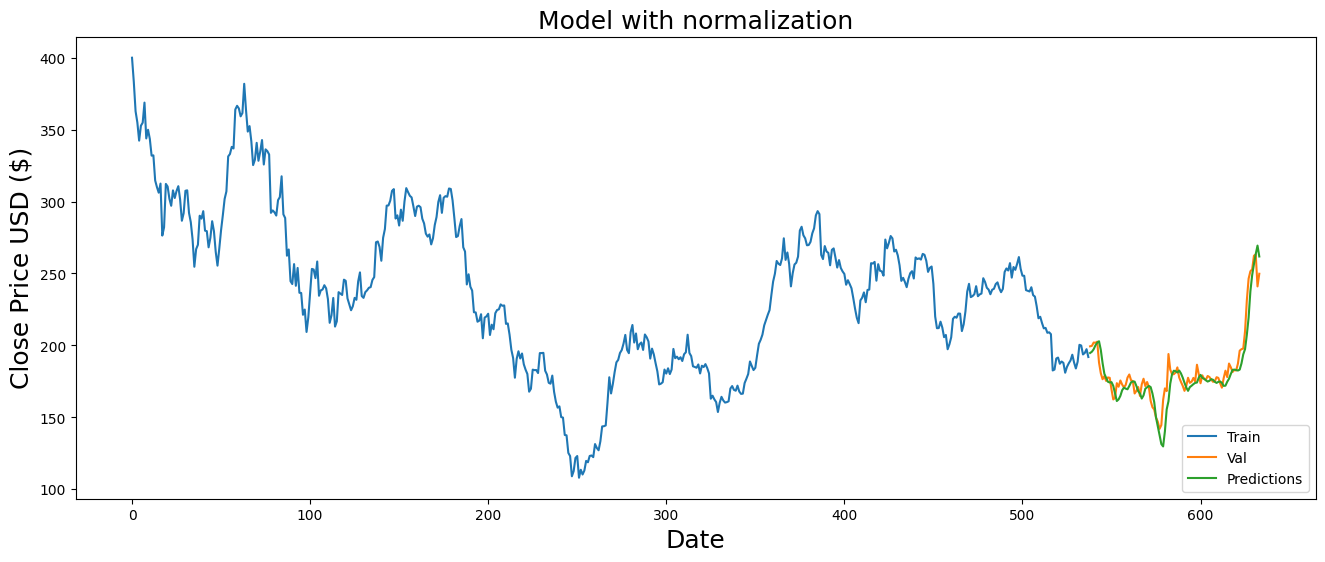

In [13]:
# quantile transformation
scalerQuantile = QuantileTransformer(output_distribution='normal')
scaled_quantile = scalerQuantile.fit_transform(data.values)

x_train_Quantile = []
y_train_Quantile = []
x_test_Quantile = []
modelQuantile = Sequential()

visualizeTrain(scaled_quantile, x_train_Quantile,
               y_train_Quantile, modelQuantile, training_data_len)
Evaluation(scaled_quantile, scalerQuantile, xtest=x_test_Quantile,
           training_data=training_data_len, data=data, model=modelQuantile)

[array([2.10566589, 1.89922873, 1.64639593, 1.55006683, 1.3948382 ,
       1.52300261, 1.54883282, 1.72084314, 1.4137584 , 1.488     ,
       1.40943956, 1.26605658, 1.26860669, 1.05320311, 0.99603089,
       0.94831879, 1.02650906, 0.58101805, 0.65196921, 1.02367088,
       1.00117216, 0.89591767, 0.83619535, 0.96855547, 0.90282767,
       0.96312613, 1.00425699, 0.89135218, 0.70811302, 0.77293594,
       0.96489449, 0.96884317, 0.77536253, 0.6956916 , 0.54988165,
       0.31341896, 0.46449368, 0.50192289, 0.75101299, 0.7260873 ,
       0.78992285, 0.62293066, 0.61881742, 0.4801645 , 0.56168626,
       0.70387665, 0.61885847, 0.44220057, 0.32300258, 0.46910022,
       0.62679687, 0.75582513, 0.89480718, 0.95967114, 1.25918763,
       1.28028816, 1.34120307, 1.3277122 , 1.66169658, 1.69349123])]
[1.6705398730763688]
60

[array([2.10566589, 1.89922873, 1.64639593, 1.55006683, 1.3948382 ,
       1.52300261, 1.54883282, 1.72084314, 1.4137584 , 1.488     ,
       1.40943956, 1.26605658, 1.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0726 - val_loss: 0.0150
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0282 - val_loss: 0.0101
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0186 - val_loss: 0.0107
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0206 - val_loss: 0.0117
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0161 - val_loss: 0.0083
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RMSE: 8.277535072970466
Median Absolute Error (MAE): 4.0800018310546875


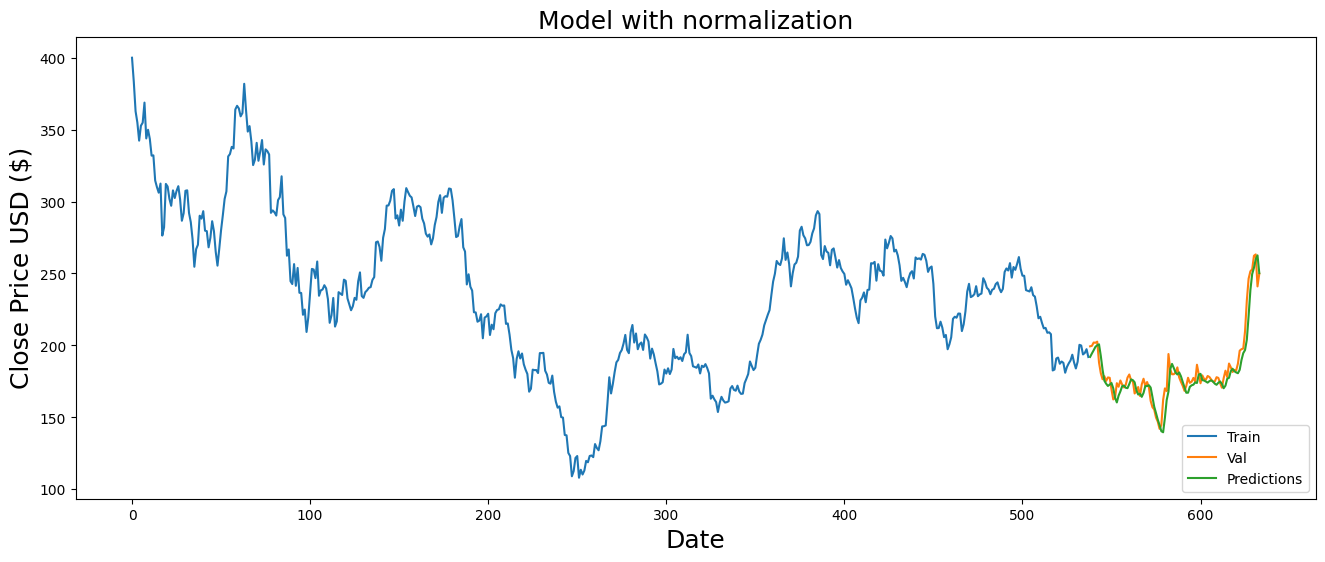

In [14]:
# Robust Scaler
scalerRobust = RobustScaler()
scaled_RobustScaler = scalerRobust.fit_transform(data.values)

x_train_Robust = []
y_train_Robust = []
x_test_Robust = []
modelRobust = Sequential()

visualizeTrain(scaled_RobustScaler, x_train_Robust,
               y_train_Robust, modelRobust, training_data_len)
Evaluation(scaled_RobustScaler, scalerRobust, xtest=x_test_Robust,
           training_data=training_data_len, data=data, model=modelRobust)

[array([2.65732059, 2.43910538, 2.16351502, 2.05593984, 1.87940978,
       2.02544844, 2.05455215, 2.2456594 , 1.90114248, 1.9858359 ,
       1.89618702, 1.72983157, 1.732822  , 1.47597493, 1.40630389,
       1.34765794, 1.44352601, 0.87975482, 0.97252488, 1.44006765,
       1.41259582, 1.28270902, 1.20798114, 1.3725887 , 1.29130642,
       1.3659082 , 1.41636851, 1.27702314, 1.04509469, 1.12798744,
       1.36808473, 1.37294253, 1.13107218, 1.02910188, 0.83866007,
       0.5185073 , 0.72472622, 0.77489421, 1.10005909, 1.06817448,
       1.14955419, 0.93470146, 0.92932772, 0.74577389, 0.85426806,
       1.03964425, 0.92938136, 0.69467527, 0.53177192, 0.73091984,
       0.93974881, 1.10619863, 1.28132641, 1.36165388, 1.72177074,
       1.74650554, 1.81746686, 1.80180752, 2.18046744, 2.21557854])]
[2.1902488230106503]
60

[array([2.65732059, 2.43910538, 2.16351502, 2.05593984, 1.87940978,
       2.02544844, 2.05455215, 2.2456594 , 1.90114248, 1.9858359 ,
       1.89618702, 1.72983157, 1.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1569 - val_loss: 0.0504
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0528 - val_loss: 0.0247
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0544 - val_loss: 0.0215
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0431 - val_loss: 0.0196
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0373 - val_loss: 0.0228
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
RMSE: 10.343274208613384
Median Absolute Error (MAE): 8.557823181152344


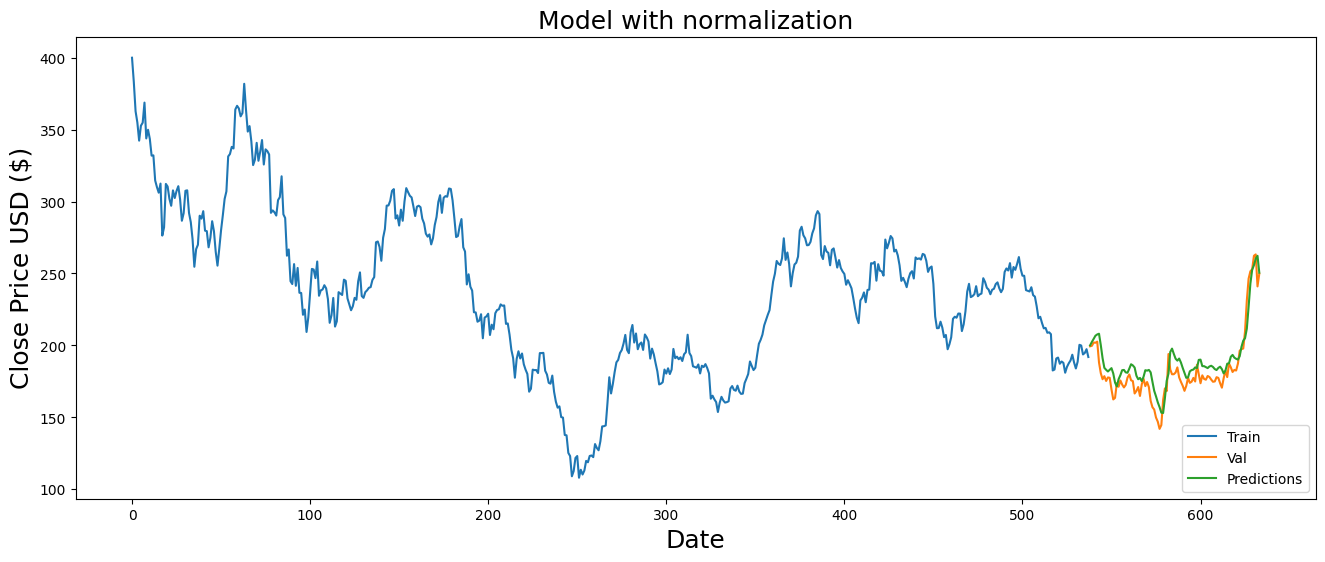

In [15]:
scalerPower = PowerTransformer(method='yeo-johnson')
scaled_power = scalerPower.fit_transform(data.values)

x_train_Power = []
y_train_Power = []
x_test_Power = []
modelPower = Sequential()

visualizeTrain(scaled_power, x_train_Power,
               y_train_Power, modelPower, training_data_len)
Evaluation(scaled_power, scalerPower, xtest=x_test_Power,
           training_data=training_data_len, data=data, model=modelPower)

In [16]:
l1_normalized = Normalizer(norm='l2')
scaled_L1 = l1_normalized.fit_transform(data.values)
#print(scaled_L1)
print("\nOriginal data:\n", data.head())
print("\nL1 Normalized data:\n", scaled_L1[:3])


Original data:
         Close
0  399.926666
1  383.196655
2  362.706665
3  354.899994
4  342.320007

L1 Normalized data:
 [[1.]
 [1.]
 [1.]]


In [17]:
# Square Root Transformation
data_sqrt = np.sqrt(data.values + np.abs(data.values.min()))
print(data_sqrt)

[[22.53944686]
 [22.16521269]
 [21.69807972]
 [21.51743461]
 [21.22310076]
 [21.46640779]
 [21.51511065]
 [21.83666615]
 [21.25919403]
 [21.40023349]
 [21.25096056]
 [20.9757796 ]
 [20.9807053 ]
 [20.5604798 ]
 [20.4474937 ]
 [20.35272291]
 [20.50780339]
 [19.60782158]
 [19.75390258]
 [20.50219473]
 [20.45767961]
 [20.24812723]
 [20.12825526]
 [20.39297292]
 [20.26195089]
 [20.38218197]
 [20.46378887]
 [20.23898864]
 [19.86873562]
 [20.00050029]
 [20.38569725]
 [20.39354456]
 [20.00541595]
 [19.84338686]
 [19.54337026]
 [19.04678427]
 [19.36551931]
 [19.44367927]
 [19.95603517]
 [19.90535908]
 [20.03488607]
 [19.69424623]
 [19.68578145]
 [19.39828156]
 [19.56783039]
 [19.86009396]
 [19.68586593]
 [19.3188164 ]
 [19.06716192]
 [19.37515574]
 [19.70219933]
 [19.96580386]
 [20.24590477]
 [20.3753121 ]
 [20.96250602]
 [21.00325405]
 [21.12044806]
 [21.09454914]
 [21.72663466]
 [21.78585193]
 [21.74312141]
 [21.61712309]
 [21.67094823]
 [22.13406152]
 [21.72218509]
 [21.37022855]
 [21.45973

In [18]:
#Logarithmic transformation
data_log = np.log(data.values + np.abs(data.values.min()) + 1)
data_log

array([[6.2325004 ],
       [6.19908149],
       [6.15656929],
       [6.13988454],
       [6.11239818],
       [6.13514633],
       [6.13966898],
       [6.16927592],
       [6.1157891 ],
       [6.12898483],
       [6.11501608],
       [6.08900707],
       [6.08947561],
       [6.04910432],
       [6.03810955],
       [6.0288406 ],
       [6.04398584],
       [5.95445472],
       [5.96926154],
       [6.04344008],
       [6.03910323],
       [6.01856075],
       [6.00671433],
       [6.03278245],
       [6.01992239],
       [6.03172641],
       [6.03969897],
       [6.01766008],
       [5.98082478],
       [5.99401133],
       [6.03207048],
       [6.03283837],
       [5.9945016 ],
       [5.97827799],
       [5.94788699],
       [5.89654926],
       [5.92965121],
       [5.9376857 ],
       [5.9895711 ],
       [5.98449864],
       [5.99743832],
       [5.96322796],
       [5.96237036],
       [5.93302294],
       [5.95038207],
       [5.97995692],
       [5.96237893],
       [5.924

In [19]:
#Exponential Transformation
data_exp = np.exp(data.values)
print(data_exp)

[[4.85226289e+173]
 [2.63143635e+166]
 [3.32279215e+157]
 [1.35241188e+154]
 [4.65254118e+148]
 [1.50854530e+153]
 [1.22370540e+154]
 [1.38593549e+160]
 [2.15578228e+149]
 [8.84317588e+151]
 [1.51914482e+149]
 [1.36489555e+144]
 [1.67823550e+144]
 [4.40067814e+136]
 [4.27847886e+134]
 [8.95398804e+132]
 [5.05821506e+135]
 [1.05808169e+120]
 [3.32439385e+122]
 [4.01887768e+135]
 [6.48994485e+134]
 [1.28147343e+131]
 [1.01327168e+129]
 [4.61600023e+133]
 [2.24343482e+131]
 [2.97286501e+133]
 [8.33325414e+134]
 [8.85162014e+130]
 [3.14591556e+124]
 [6.01521270e+126]
 [3.43094826e+133]
 [4.72488872e+133]
 [7.32246474e+126]
 [1.14964377e+124]
 [8.48484627e+118]
 [4.03752729e+110]
 [8.38172843e+115]
 [1.74056393e+117]
 [1.01777548e+126]
 [1.35010843e+125]
 [2.38298658e+127]
 [3.15989857e+121]
 [2.26414323e+121]
 [2.98457712e+116]
 [2.20860640e+119]
 [2.23174147e+124]
 [2.27168725e+121]
 [1.37627835e+115]
 [8.77849350e+110]
 [1.21748906e+116]
 [4.32262953e+121]
 [1.50321099e+126]
 [1.17118282

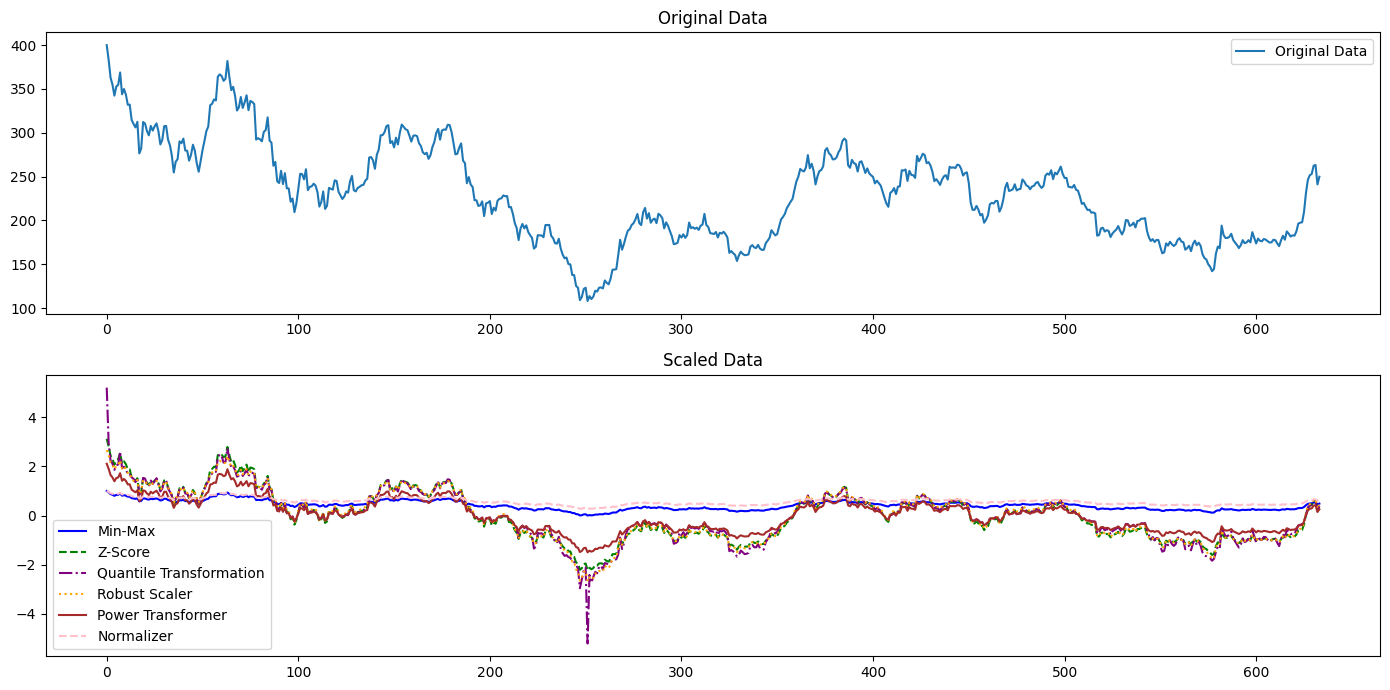

In [20]:
scaled_df = pd.DataFrame(scaled_data, columns=['Close'])
scaled_df2 = pd.DataFrame(scaled_Z_Score, columns=['Close'])
scaled_df3 = pd.DataFrame(scaled_quantile, columns=['Close'])
scaled_df4 = pd.DataFrame(scaled_power, columns=['Close'])
scaled_df5 = pd.DataFrame(scaled_RobustScaler, columns=['Close'])
scaled_df6 = pd.DataFrame(scaled_MaxAbs, columns=['Close'])

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Data')
plt.title('Original Data')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(scaled_df, label='Min-Max', color='blue', linestyle='-')
plt.plot(scaled_df2, label='Z-Score', color='green', linestyle='--')
plt.plot(scaled_df3, label='Quantile Transformation',
         color='purple', linestyle='-.')
plt.plot(scaled_df4, label='Robust Scaler', color='orange', linestyle=':')
plt.plot(scaled_df5, label='Power Transformer', color='brown', linestyle='-')
plt.plot(scaled_df6, label='Normalizer', color='pink', linestyle='--')
plt.title('Scaled Data')
plt.legend()

plt.tight_layout()
plt.show()

/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_57834/226226971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = all_predictions_list[i]
/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_57834/226226971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = all_predictions_list[i]
/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_57834/226226971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

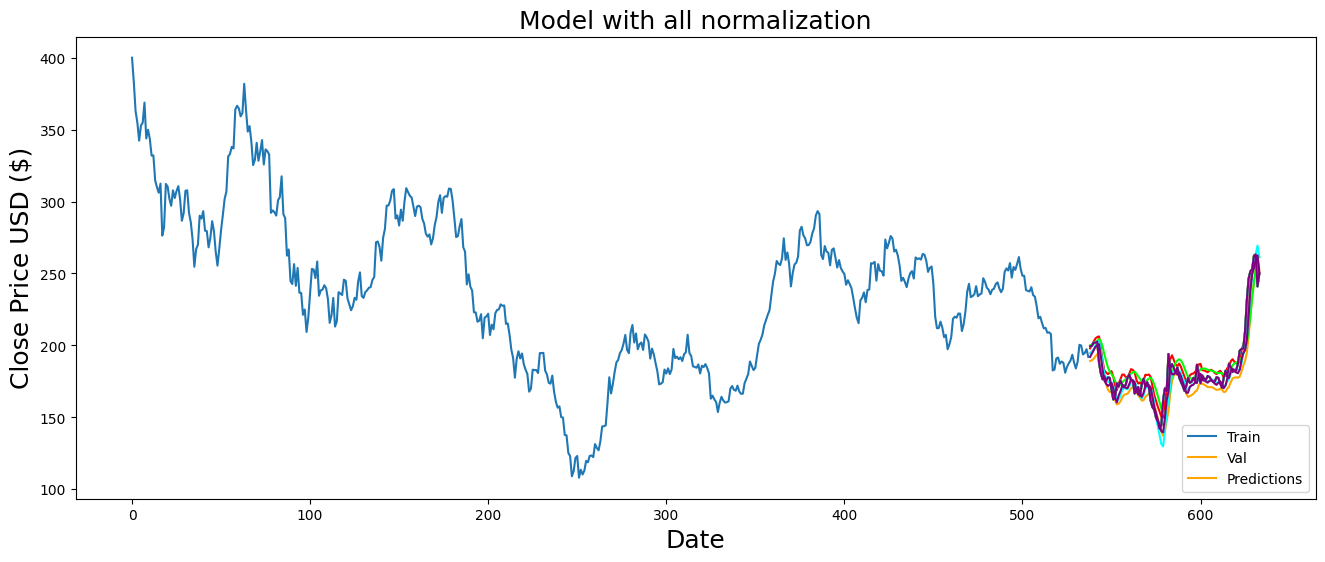

In [21]:
train1 = data[:training_data_len]
valid1 = data[training_data_len:]
colors = ['orange', 'red', 'lime', 'cyan', 'purple', 'brown']

plt.figure(figsize=(16, 6))
plt.title('Model with all normalization', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)  
plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
for i in range(len(all_predictions_list)-1):
    valid['Predictions'] = all_predictions_list[i]
    plt.plot(valid[['Close', 'Predictions']], colors[i])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_57834/1635867209.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions'] = predictions


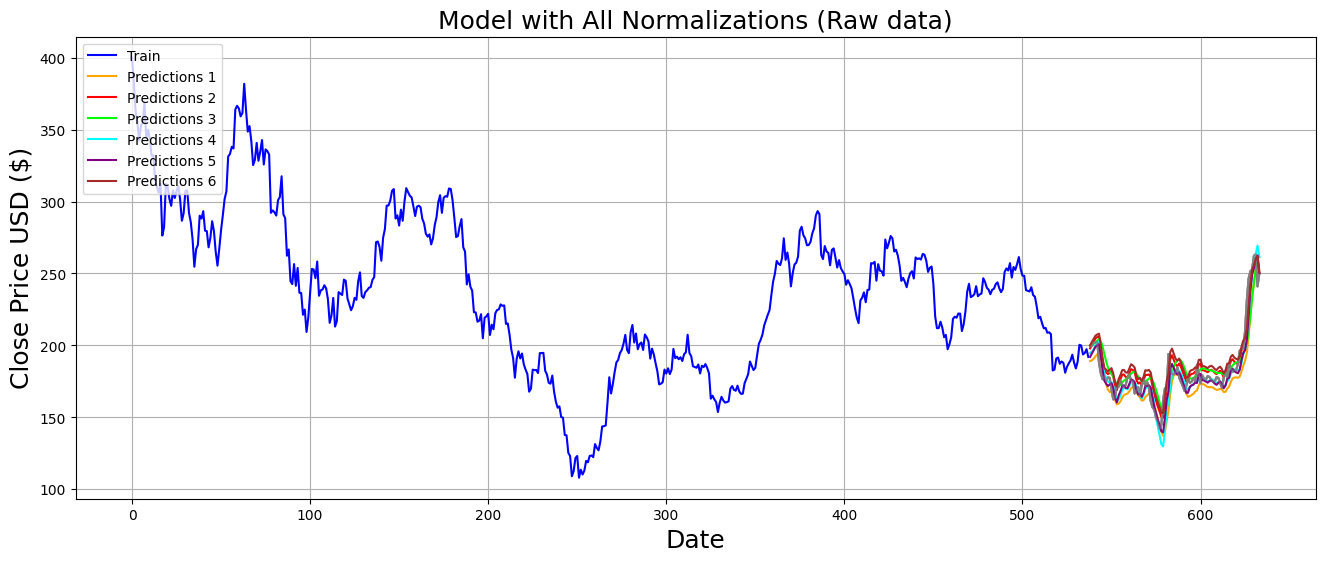

In [22]:
train1 = data[:training_data_len]
valid1 = data[training_data_len:]
    
plt.figure(figsize=(16, 6))
plt.title('Model with All Normalizations (Raw data)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
    
    # Plot the training data
plt.plot(train1['Close'], label='Train', color='blue')
    
colors = ['orange', 'red', 'lime', 'cyan', 'purple', 'brown']
for i, predictions in enumerate(all_predictions_list):
    valid1['Predictions'] = predictions
    plt.plot(valid1['Close'], color='gray', alpha=0.5)  # Plot the actual validation data
    plt.plot(valid1['Predictions'], label=f'Predictions {i+1}', color=colors[i % len(colors)])
    
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Report 

dataset: 538 data
train 478 ข้อมูล

LSTM Model

🔥train(with raw data)

1. Min-Max Normalization
RMSE: 6.165119805120682
Median Absolute Error (MAE): 3.4629364013671875

2. Z-Score Normalization
RMSE: 6.635036062852706
Median Absolute Error (MAE): 3.8307342529296875

3. Max Abs Scaling
RMSE: 11.782300010542874
Median Absolute Error (MAE): 9.60858154296875

4. quantile transformation
RMSE: 8.28128401352164
Median Absolute Error (MAE): 3.649993896484375

5. Robust Scaler
RMSE: 5.887000780993204
Median Absolute Error (MAE): 3.4169769287109375

6. PowerTransformer
RMSE: 6.690815007573578
Median Absolute Error (MAE): 3.805145263671875

Section EMA 

In [23]:
data1 = dataset.filter(['Close']).ewm(span=20, adjust=False).mean()
# training_data_len = int(np.ceil(len(data.values) * .95))
training_data_len1 = int(np.ceil(len(data1.values)) * .85)
all_predictions_list.clear()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[array([1.        , 0.99411615, 0.98158645, 0.96750449, 0.95033937,
       0.93846194, 0.92845191, 0.92429783, 0.91178689, 0.90258349,
       0.89201748, 0.87837107, 0.866097  , 0.84885248, 0.83162078,
       0.81467031, 0.80156273, 0.77700616, 0.75681056, 0.74913255,
       0.74154452, 0.7316792 , 0.72105124, 0.71520799, 0.70804786,
       0.70328828, 0.70015429, 0.69410078, 0.68340113, 0.67556807,
       0.6739522 , 0.67260277, 0.66586728, 0.6575025 , 0.64577851,
       0.62843145, 0.61704241, 0.60780484, 0.60654658, 0.60469773,
       0.60484439, 0.60021749, 0.59591401, 0.58806851, 0.58329373,
       0.58302639, 0.58036133, 0.572915  , 0.56278047, 0.5577752 ,
       0.55774127, 0.56138813, 0.56864891, 0.57706694, 0.59322005,
       0.60843616, 0.62393931, 0.63758146, 0.65944354, 0.68012973])]
[0.6981916504698775]
60

[array([1.        , 0.99411615, 0.98158645, 0.96750449, 0.95033937,
       0.93846194, 0.92845191, 0.92429783, 0.91178689, 0.90258349,
       0.89201748, 0.87837107, 0.

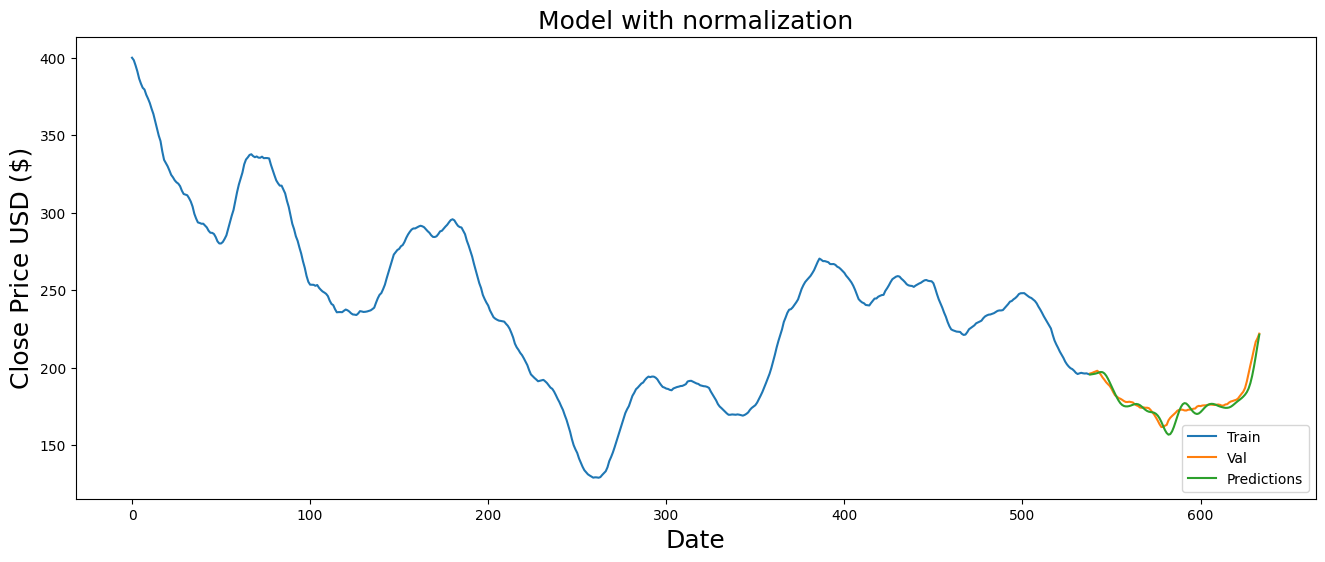

In [24]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaled_data1 = scaler1.fit_transform(data1.values)
x_train_MinMax = []
y_train_MinMax = []
x_test_MinMax = []
modelMinMax = Sequential()

visualizeTrain(scaled_data1, x_train_MinMax,
               y_train_MinMax, modelMinMax, training_data_len1)
Evaluation(scaled_data1, scaler1, xtest=x_test_MinMax,
           training_data=training_data_len1, data=data1, model=modelMinMax)

#RMSE: 3.8463532843199926
#Median Absolute Error (MAE): 3.3789286138343755

[array([3.07543884, 3.04621868, 2.98399416, 2.91406088, 2.82881606,
       2.76983083, 2.72011939, 2.69948958, 2.63735818, 2.59165259,
       2.53918008, 2.47140979, 2.41045477, 2.32481568, 2.23924025,
       2.15506144, 2.08996711, 1.96801519, 1.86772053, 1.82959027,
       1.79190688, 1.74291414, 1.69013397, 1.6611154 , 1.62555706,
       1.60192018, 1.5863563 , 1.55629358, 1.50315738, 1.46425713,
       1.45623245, 1.44953094, 1.41608144, 1.37454058, 1.31631732,
       1.230169  , 1.17360917, 1.1277339 , 1.12148518, 1.11230347,
       1.11303182, 1.09005388, 1.0686821 , 1.0297201 , 1.00600776,
       1.00468009, 0.99144497, 0.95446527, 0.90413557, 0.87927857,
       0.87911009, 0.89722096, 0.93327921, 0.97508452, 1.05530345,
       1.13086916, 1.20786033, 1.27560945, 1.38418011, 1.48691108])]
[1.5766095040900812]
60

[array([3.07543884, 3.04621868, 2.98399416, 2.91406088, 2.82881606,
       2.76983083, 2.72011939, 2.69948958, 2.63735818, 2.59165259,
       2.53918008, 2.47140979, 2.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1493 - val_loss: 0.0111
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0120 - val_loss: 0.0039
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0059 - val_loss: 0.0041
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
RMSE: 2.9192474837331353
Median Absolute Error (MAE): 1.485706157059525


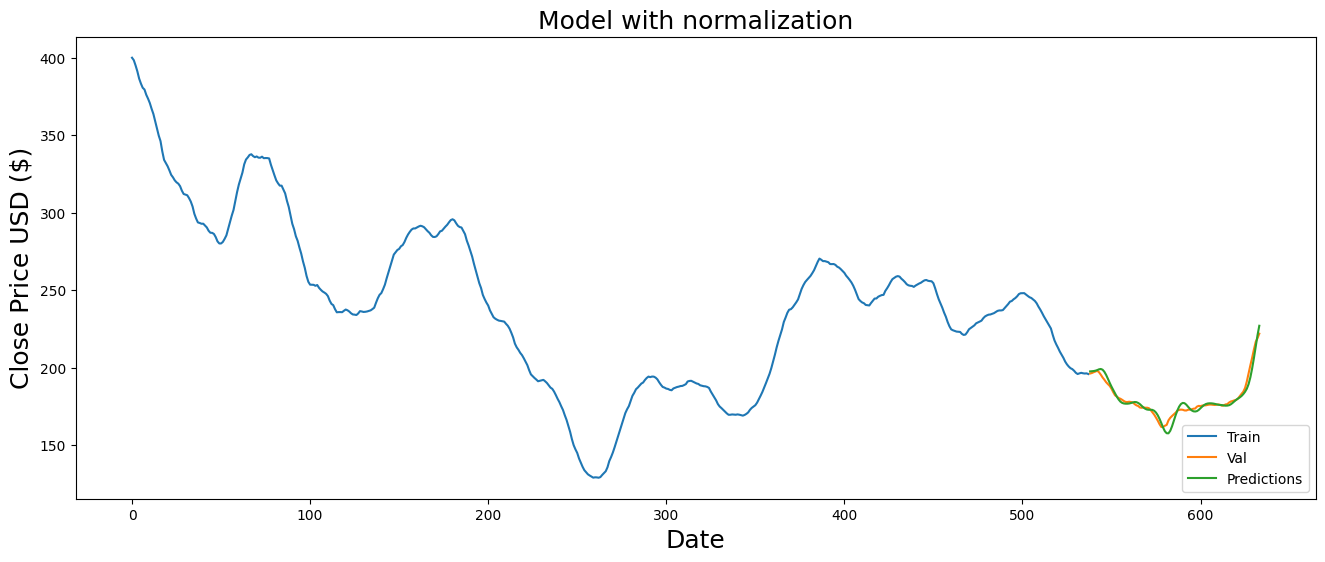

In [25]:
# Z-Score Normalization
scalerZScore = StandardScaler()
# scaled_Z_Score = scalerZScore.fit_transform(data.values)
scaled_Z_Score = scalerZScore.fit_transform(data1.values.reshape(-1, 1))

x_train_Z = []
y_train_Z = []
x_test_Z = []
modelZ1 = Sequential()

visualizeTrain(scaled_Z_Score, x_train_Z, y_train_Z, modelZ1, training_data_len1)
Evaluation(scaled_Z_Score, scalerZScore, xtest=x_test_Z, 
           training_data=training_data_len1, data=data1, model=modelZ1)
#RMSE: 3.1282552618485857
#Median Absolute Error (MAE): 1.8592423017175577

[array([1.        , 0.99601593, 0.98753184, 0.97799668, 0.96637385,
       0.95833142, 0.95155344, 0.94874064, 0.94026924, 0.93403744,
       0.926883  , 0.91764276, 0.90933175, 0.89765517, 0.88598726,
       0.87450977, 0.86563439, 0.84900667, 0.83533184, 0.83013292,
       0.82499492, 0.81831493, 0.81111854, 0.80716196, 0.80231371,
       0.7990909 , 0.79696882, 0.79286987, 0.78562494, 0.78032103,
       0.77922689, 0.77831316, 0.77375244, 0.76808849, 0.76014995,
       0.74840393, 0.7406922 , 0.73443726, 0.73358527, 0.73233338,
       0.73243269, 0.72929972, 0.72638576, 0.72107343, 0.71784033,
       0.71765931, 0.71585475, 0.71081269, 0.70395042, 0.70056125,
       0.70053828, 0.70300763, 0.70792405, 0.71362406, 0.72456163,
       0.73486475, 0.74536222, 0.75459958, 0.76940281, 0.78340981])]
[0.7956398779528208]
60

[array([1.        , 0.99601593, 0.98753184, 0.97799668, 0.96637385,
       0.95833142, 0.95155344, 0.94874064, 0.94026924, 0.93403744,
       0.926883  , 0.91764276, 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0187 - val_loss: 5.8645e-04
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0011 - val_loss: 6.2794e-04
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 6.8142e-04 - val_loss: 3.0537e-04
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.1973e-04 - val_loss: 9.6093e-05
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 3.1195e-04 - val_loss: 1.8194e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
RMSE: 5.240363288183816
Median Absolute Error (MAE): 3.945597280853434


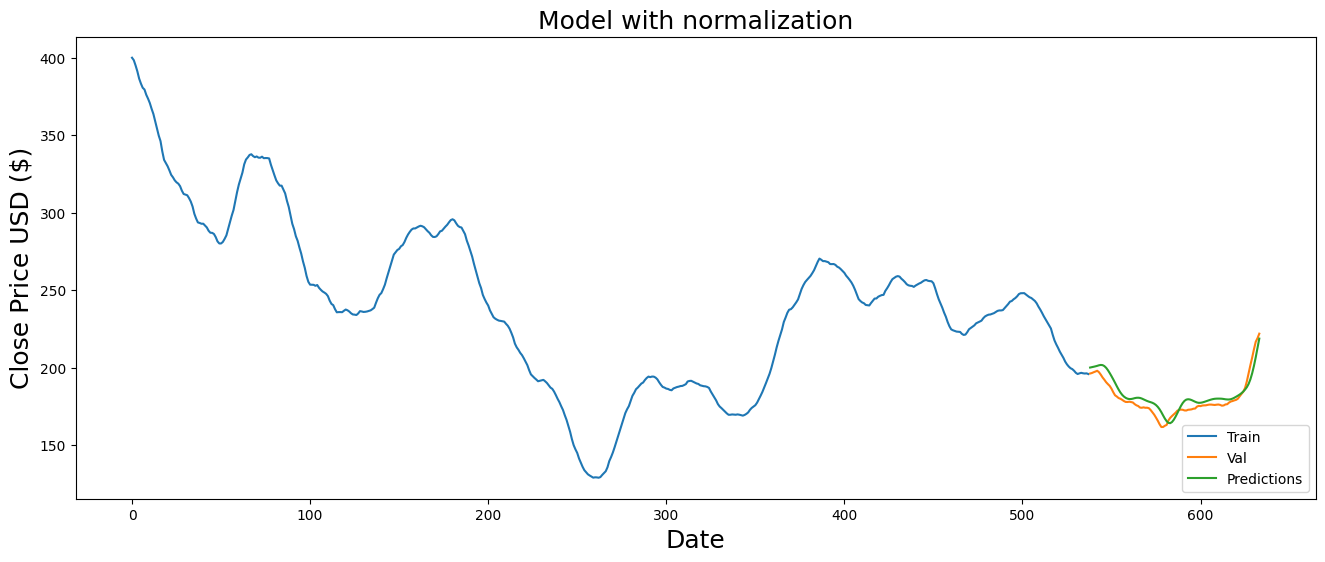

In [26]:
# Max Abs Scaling
scalerMaxAbs = MaxAbsScaler()
scaled_MaxAbs = scalerMaxAbs.fit_transform(data1.values)

x_train_MaxAbs = []
y_train_MaxAbs = []
x_test_MaxAbs = []
modelMaxAbs1 = Sequential()

visualizeTrain(scaled_MaxAbs, x_train_MaxAbs,
               y_train_MaxAbs, modelMaxAbs1, training_data_len1)
Evaluation(scaled_MaxAbs, scalerMaxAbs, xtest=x_test_MaxAbs,
           training_data=training_data_len1, data=data1, model=modelMaxAbs1)

[array([5.19933758, 2.95177236, 2.730746  , 2.59428916, 2.49380401,
       2.41355396, 2.34636867, 2.28835418, 2.23715117, 2.19121802,
       2.14949002, 2.11119989, 2.0757758 , 2.04277971, 2.01186844,
       1.98276787, 1.95525548, 1.92914809, 1.63951598, 1.62451753,
       1.58158616, 1.55450841, 1.52852474, 1.5035339 , 1.47944831,
       1.45619163, 1.43369693, 1.39076402, 1.3702268 , 1.34046324,
       1.33080147, 1.32126235, 1.31184197, 1.28425675, 1.27527566,
       1.24893086, 1.22342547, 1.17467096, 1.16681289, 1.14366013,
       1.1513092 , 1.12110473, 1.06357837, 0.99627752, 0.95798034,
       0.94552329, 0.93934948, 0.87946921, 0.85068437, 0.83374733,
       0.82815462, 0.84501177, 0.86786903, 0.90900188, 1.0293451 ,
       1.19060862, 1.23183834, 1.25761561, 1.30253659, 1.36017146])]
[1.4227166035657643]
60

[array([5.19933758, 2.95177236, 2.730746  , 2.59428916, 2.49380401,
       2.41355396, 2.34636867, 2.28835418, 2.23715117, 2.19121802,
       2.14949002, 2.11119989, 2.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2764: UserWarning: n_quantiles (1000) is greater than the total number of samples (634). n_quantiles is set to n_samples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.2513 - val_loss: 0.0113
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0355 - val_loss: 0.0063
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0361 - val_loss: 0.0039
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0189 - val_loss: 0.0079
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0441 - val_loss: 0.0026
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
RMSE: 2.7097909457104605
Median Absolute Error (MAE): 0.8346371792438845


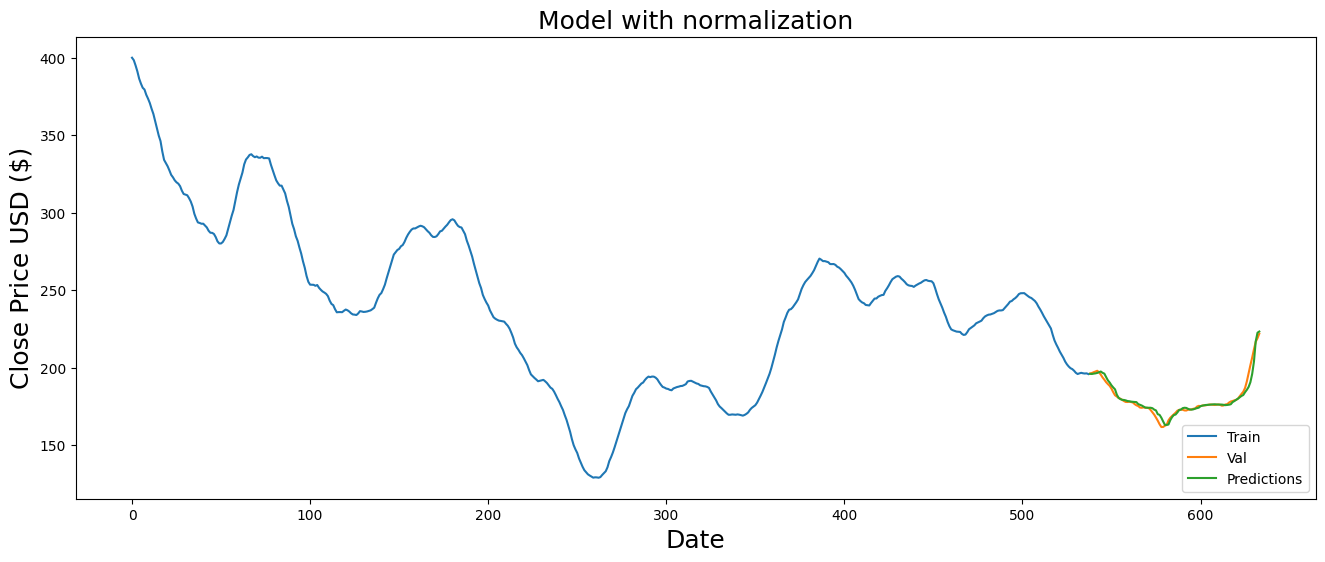

In [27]:
# quantile transformation
scalerQuantile = QuantileTransformer(output_distribution='normal')
scaled_quantile = scalerQuantile.fit_transform(data1.values)

x_train_Quantile = []
y_train_Quantile = []
x_test_Quantile = []
modelQuantile1 = Sequential()

visualizeTrain(scaled_quantile, x_train_Quantile,
               y_train_Quantile, modelQuantile1, training_data_len1)
Evaluation(scaled_quantile, scalerQuantile, xtest=x_test_Quantile,
           training_data=training_data_len1, data=data1, model=modelQuantile1)

[array([2.12697306, 2.10644519, 2.06273098, 2.01360117, 1.95371464,
       1.91227611, 1.87735263, 1.86285969, 1.8192109 , 1.78710163,
       1.75023843, 1.70262818, 1.65980582, 1.5996423 , 1.53952351,
       1.48038588, 1.43465556, 1.34898141, 1.27852201, 1.25173459,
       1.22526111, 1.19084253, 1.15376319, 1.13337696, 1.10839637,
       1.0917909 , 1.0808569 , 1.05973712, 1.02240766, 0.9950793 ,
       0.98944177, 0.9847338 , 0.96123473, 0.93205128, 0.89114804,
       0.83062679, 0.79089215, 0.75866368, 0.7542738 , 0.74782343,
       0.74833511, 0.73219255, 0.71717837, 0.68980663, 0.67314815,
       0.67221543, 0.66291743, 0.63693831, 0.60158049, 0.58411785,
       0.58399949, 0.59672281, 0.6220546 , 0.65142383, 0.70777955,
       0.76086627, 0.81495441, 0.86254979, 0.93882328, 1.01099425])]
[1.0740095397027103]
60

[array([2.12697306, 2.10644519, 2.06273098, 2.01360117, 1.95371464,
       1.91227611, 1.87735263, 1.86285969, 1.8192109 , 1.78710163,
       1.75023843, 1.70262818, 1.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0646 - val_loss: 0.0026
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0026 - val_loss: 9.3901e-04
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0018 - val_loss: 9.4600e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
RMSE: 2.9261794145771125
Median Absolute Error (MAE): 1.7025558463092665


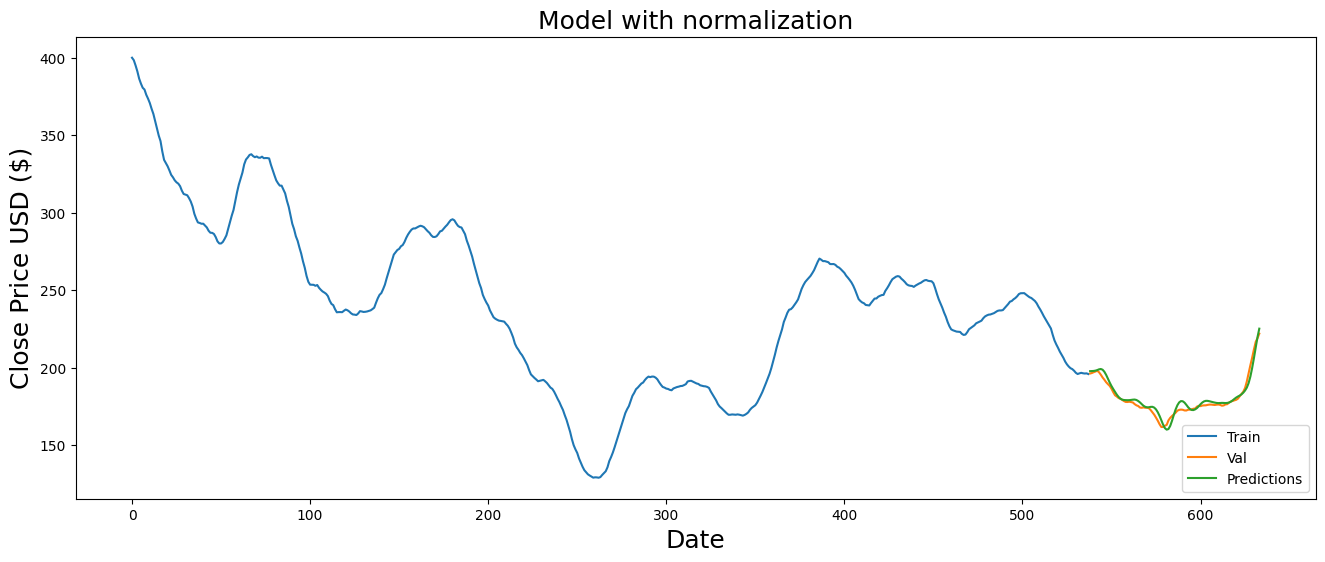

In [28]:
# Robust Scaler
scalerRobust = RobustScaler()
scaled_RobustScaler = scalerRobust.fit_transform(data1.values)

x_train_Robust = []
y_train_Robust = []
x_test_Robust = []
modelRobust1 = Sequential()

visualizeTrain(scaled_RobustScaler, x_train_Robust,
               y_train_Robust, modelRobust1, training_data_len1)
Evaluation(scaled_RobustScaler, scalerRobust, xtest=x_test_Robust,
           training_data=training_data_len1, data=data1, model=modelRobust1)

[array([2.4610449 , 2.44361365, 2.40626908, 2.36392787, 2.31177591,
       2.27533491, 2.24439408, 2.23149161, 2.19240942, 2.16344264,
       2.12995709, 2.0863394 , 2.0467457 , 1.99052627, 1.93364164,
       1.87697805, 1.83266835, 1.74846686, 1.6780216 , 1.65094826,
       1.62403154, 1.58879468, 1.55052299, 1.52934187, 1.50325074,
       1.48582303, 1.4743107 , 1.45199013, 1.41226554, 1.38295981,
       1.37689056, 1.37181576, 1.3463998 , 1.31463452, 1.26973154,
       1.20245831, 1.15773658, 1.12113316, 1.1161242 , 1.108754  ,
       1.10933909, 1.09084381, 1.07357269, 1.04191435, 1.02253713,
       1.0214497 , 1.01059509, 0.98012673, 0.93832357, 0.917533  ,
       0.91739175, 0.93254981, 0.96257735, 0.99714089, 1.06272711,
       1.12364427, 1.18487203, 1.23806823, 1.32202565, 1.4000495 ])]
[1.4670861367871586]
60

[array([2.4610449 , 2.44361365, 2.40626908, 2.36392787, 2.31177591,
       2.27533491, 2.24439408, 2.23149161, 2.19240942, 2.16344264,
       2.12995709, 2.0863394 , 2.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1187 - val_loss: 0.0054
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0160 - val_loss: 0.0033
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0069 - val_loss: 0.0051
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0041 - val_loss: 0.0011
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
RMSE: 3.3497440508943463
Median Absolute Error (MAE): 2.6461054600059555


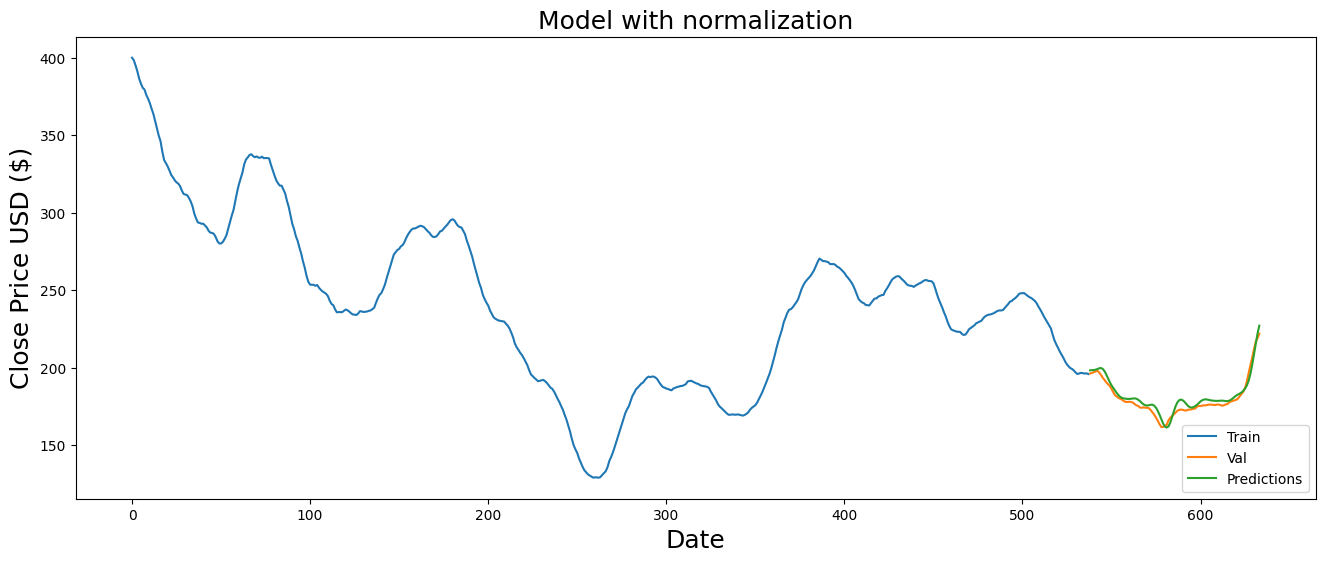

In [29]:
scalerPower = PowerTransformer(method='yeo-johnson')
scaled_power = scalerPower.fit_transform(data1.values)

x_train_Power = []
y_train_Power = []
x_test_Power = []
modelPower1 = Sequential()

visualizeTrain(scaled_power, x_train_Power,
               y_train_Power, modelPower1, training_data_len)
Evaluation(scaled_power, scalerPower, xtest=x_test_Power,
           training_data=training_data_len1, data=data1, model=modelPower1)

/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_57834/80350820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions'] = np.nan
/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_57834/80350820.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions'] = predictions


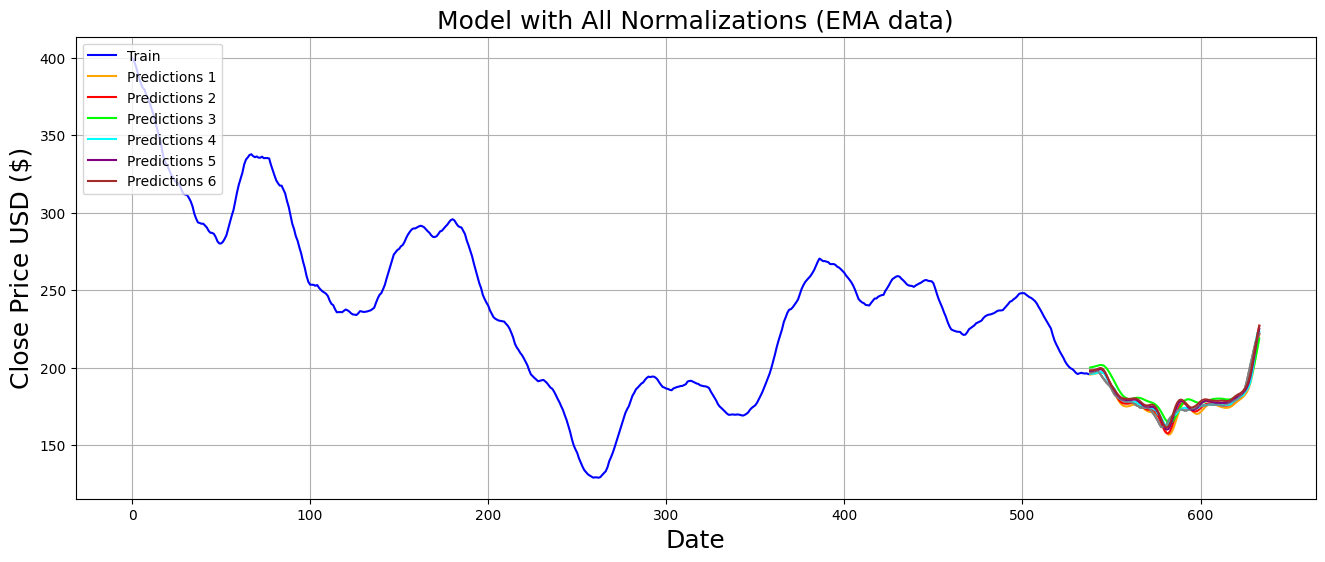

In [30]:
dataset['EMA'] = dataset['Close'].ewm(span=20, adjust=False).mean()

# Split the data into training and validation sets
train1 = dataset[:training_data_len1]
valid1 = dataset[training_data_len1:]
valid1['Predictions'] = np.nan

plt.figure(figsize=(16, 6))
plt.title('Model with All Normalizations (EMA data)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the training data with EMA
plt.plot(train1['EMA'], label='Train', color='blue')

colors = ['orange', 'red', 'lime', 'cyan', 'purple', 'brown']

for i, predictions in enumerate(all_predictions_list):
    #valid1['Predictions'] = predictions
    predictions = np.array(predictions)
    if len(predictions) > len(valid1):
        predictions = predictions[:len(valid1)]
    elif len(predictions) < len(valid1):
        predictions = np.pad(predictions, (0, len(
            valid1) - len(predictions)), 'constant', constant_values=np.nan)
    valid1['Predictions'] = predictions
    # Plot the actual validation data with EMA
    plt.plot(valid1['EMA'], color='gray', alpha=0.5)
    plt.plot(valid1['Predictions'], label=f'Predictions {i+1}', color=colors[i % len(colors)])

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Report 

dataset: 538 data
train 478 ข้อมูล

LSTM Model

🔥train(with EMA data)

1. Min-Max Normalization
RMSE: 2.4937740914124293
Median Absolute Error (MAE): 2.153193195232035

2. Z-Score Normalization
RMSE: 3.1600108786992727
Median Absolute Error (MAE): 1.4888245468952164

3. Max Abs Scaling
RMSE: 5.7425514794266235
Median Absolute Error (MAE): 2.95393078681289

4. quantile transformation
RMSE: 1.6630784870558561
Median Absolute Error (MAE): 1.1893244487996526

5. Robust Scaler
RMSE: 1.7242712336164912
Median Absolute Error (MAE): 1.1533978634525113

6. PowerTransformer
RMSE: 2.2285651404034157
Median Absolute Error (MAE): 0.9683106340968095